In [2]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Modelling
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Selection
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# STEP 1) LOAD RAW DATAFRAME

# Read DataFrame
input_path = "/workspaces/exploratory-data-analysis-project/data/raw/internal-link.csv"
df_raw=pd.read_csv(input_path)

In [4]:
# STEP 2) EXPLORE DATAFRAME

# Copy  of previous DataFrame
df_S2 = df_raw.copy()

# Print info
print(f"- ℹ️ Shape of the original DataFrame: {df_S2.shape}")

print("- ℹ️ Content of the original DataFrame:")
display(df_S2.head(5))

print("- ℹ️ Info of the original DataFrame (dataType and non-nul values):")
display(df_S2.info())

print(df_S2["id"].value_counts())

- ℹ️ Shape of the original DataFrame: (48895, 16)
- ℹ️ Content of the original DataFrame:


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

- ℹ️ Info of the original DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews         

None

id
36487245    1
2539        1
2595        1
3647        1
3831        1
           ..
10452       1
10962       1
11452       1
11708       1
11943       1
Name: count, Length: 48895, dtype: int64


CONCLUSIONS:
- id is not relevant for being unique id for each row. -> Drop it
- name, host_id, host_name are not relevant in the analysis -> Drop them
- last_review and reviews_per_month have a lot of null values -> Drop them
- neighbourhood_group, neighbourhood, room_type are CATEGORY variables
- latitude, longitude, price, min_nights, number_reviews, host_list_cont. availa are NUMERIC
- price is going to be the target variable of the analysis

In [5]:
# STEP 3) FIND DUPLICATES

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

num_duplicates=df_S3.duplicated().sum()
if num_duplicates == 0:
    df_S3=df_S3
    print("- ✅ Original DataFrame does not contain duplicates:")
else:
    df_S3_duplicates=df_S3[df_S3.duplicated()] #Works as bool mask
    df_S3=df_S3.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped\n")


- ✅ Original DataFrame does not contain duplicates:


In [6]:
# STEP 4) SELECT RELEVANT ATTRIBUTES

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

# Drop non-relevant attributes
df_S4=df_S3.drop(labels=["id","name","host_id", "host_name","last_review","reviews_per_month"], axis =1)

print("- ✅ Non-Relevant attributes have been dropped.")
print(f" - ℹ️ Original df's columns: {len(df_S3.columns)}")
print(f" - ℹ️ Cleaned df's  columns: {len(df_S4.columns)}")
print(f" - ℹ️ Final DataFrame shape: {df_S4.shape}")
display(df_S4.head())

- ✅ Non-Relevant attributes have been dropped.
 - ℹ️ Original df's columns: 16
 - ℹ️ Cleaned df's  columns: 10
 - ℹ️ Final DataFrame shape: (48895, 10)


neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    149               1                  9                               6   
1    225               1                 45                               2   
2    150               3                  0                               1   
3     89               1                270                               1   
4     80              10                  9                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

In [7]:
# STEP 5) ATTRIBUTE'S DATA TYPE AND TARGET VARIABLE

# Copy  of previous DataFrame
df_S5 = df_S4.copy()

# List of columns
columns = df_S5.columns.tolist()

 # [%] Under this percentage of unique values, the attribute would be proposed as CATEGORIC
var_type_proposal_threshold = 0.05

# Iterate through columns
category_var_auto = []
numeric_var_auto = []
for col in df_S5.columns:
    col_data = df_S5[col].dropna()
    total_rows = len(df_S5)

    # Skip empty columns
    if total_rows == 0:
        continue
    
    # Define local variables for each loop
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S5[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue
    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

# Print proposed Data Types
print("- ℹ️ Proposed CATEGORY Attributes: " + str(category_var_auto))
print("- ℹ️ Proposed NUMERIC Attributes: " + str(numeric_var_auto))

- ℹ️ Proposed CATEGORY Attributes: ['neighbourhood_group', 'neighbourhood', 'room_type']
- ℹ️ Proposed NUMERIC Attributes: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


CONCLUSIONS:
- Proposal of CATEGORY vs NUMERIC values matches perfectly out previous assumption

In [8]:
# Confirm categories and target variable
category_var = category_var_auto
numeric_var = numeric_var_auto
y_var = "price"

In [9]:
# Confirm setup before plottings
figHeight_unit = 8 # Unitary figure height
figWidth_unit = 12 # Unitary figure width
num_cols = 2 # Number of columns per plot
my_palette = "pastel"
my_font_size = 15
num_values_to_plot = 40 # Max number of different values to plot (for CATEGORY_var)
num_bins = 100# Num of bins (for NUMERIC_var plots)

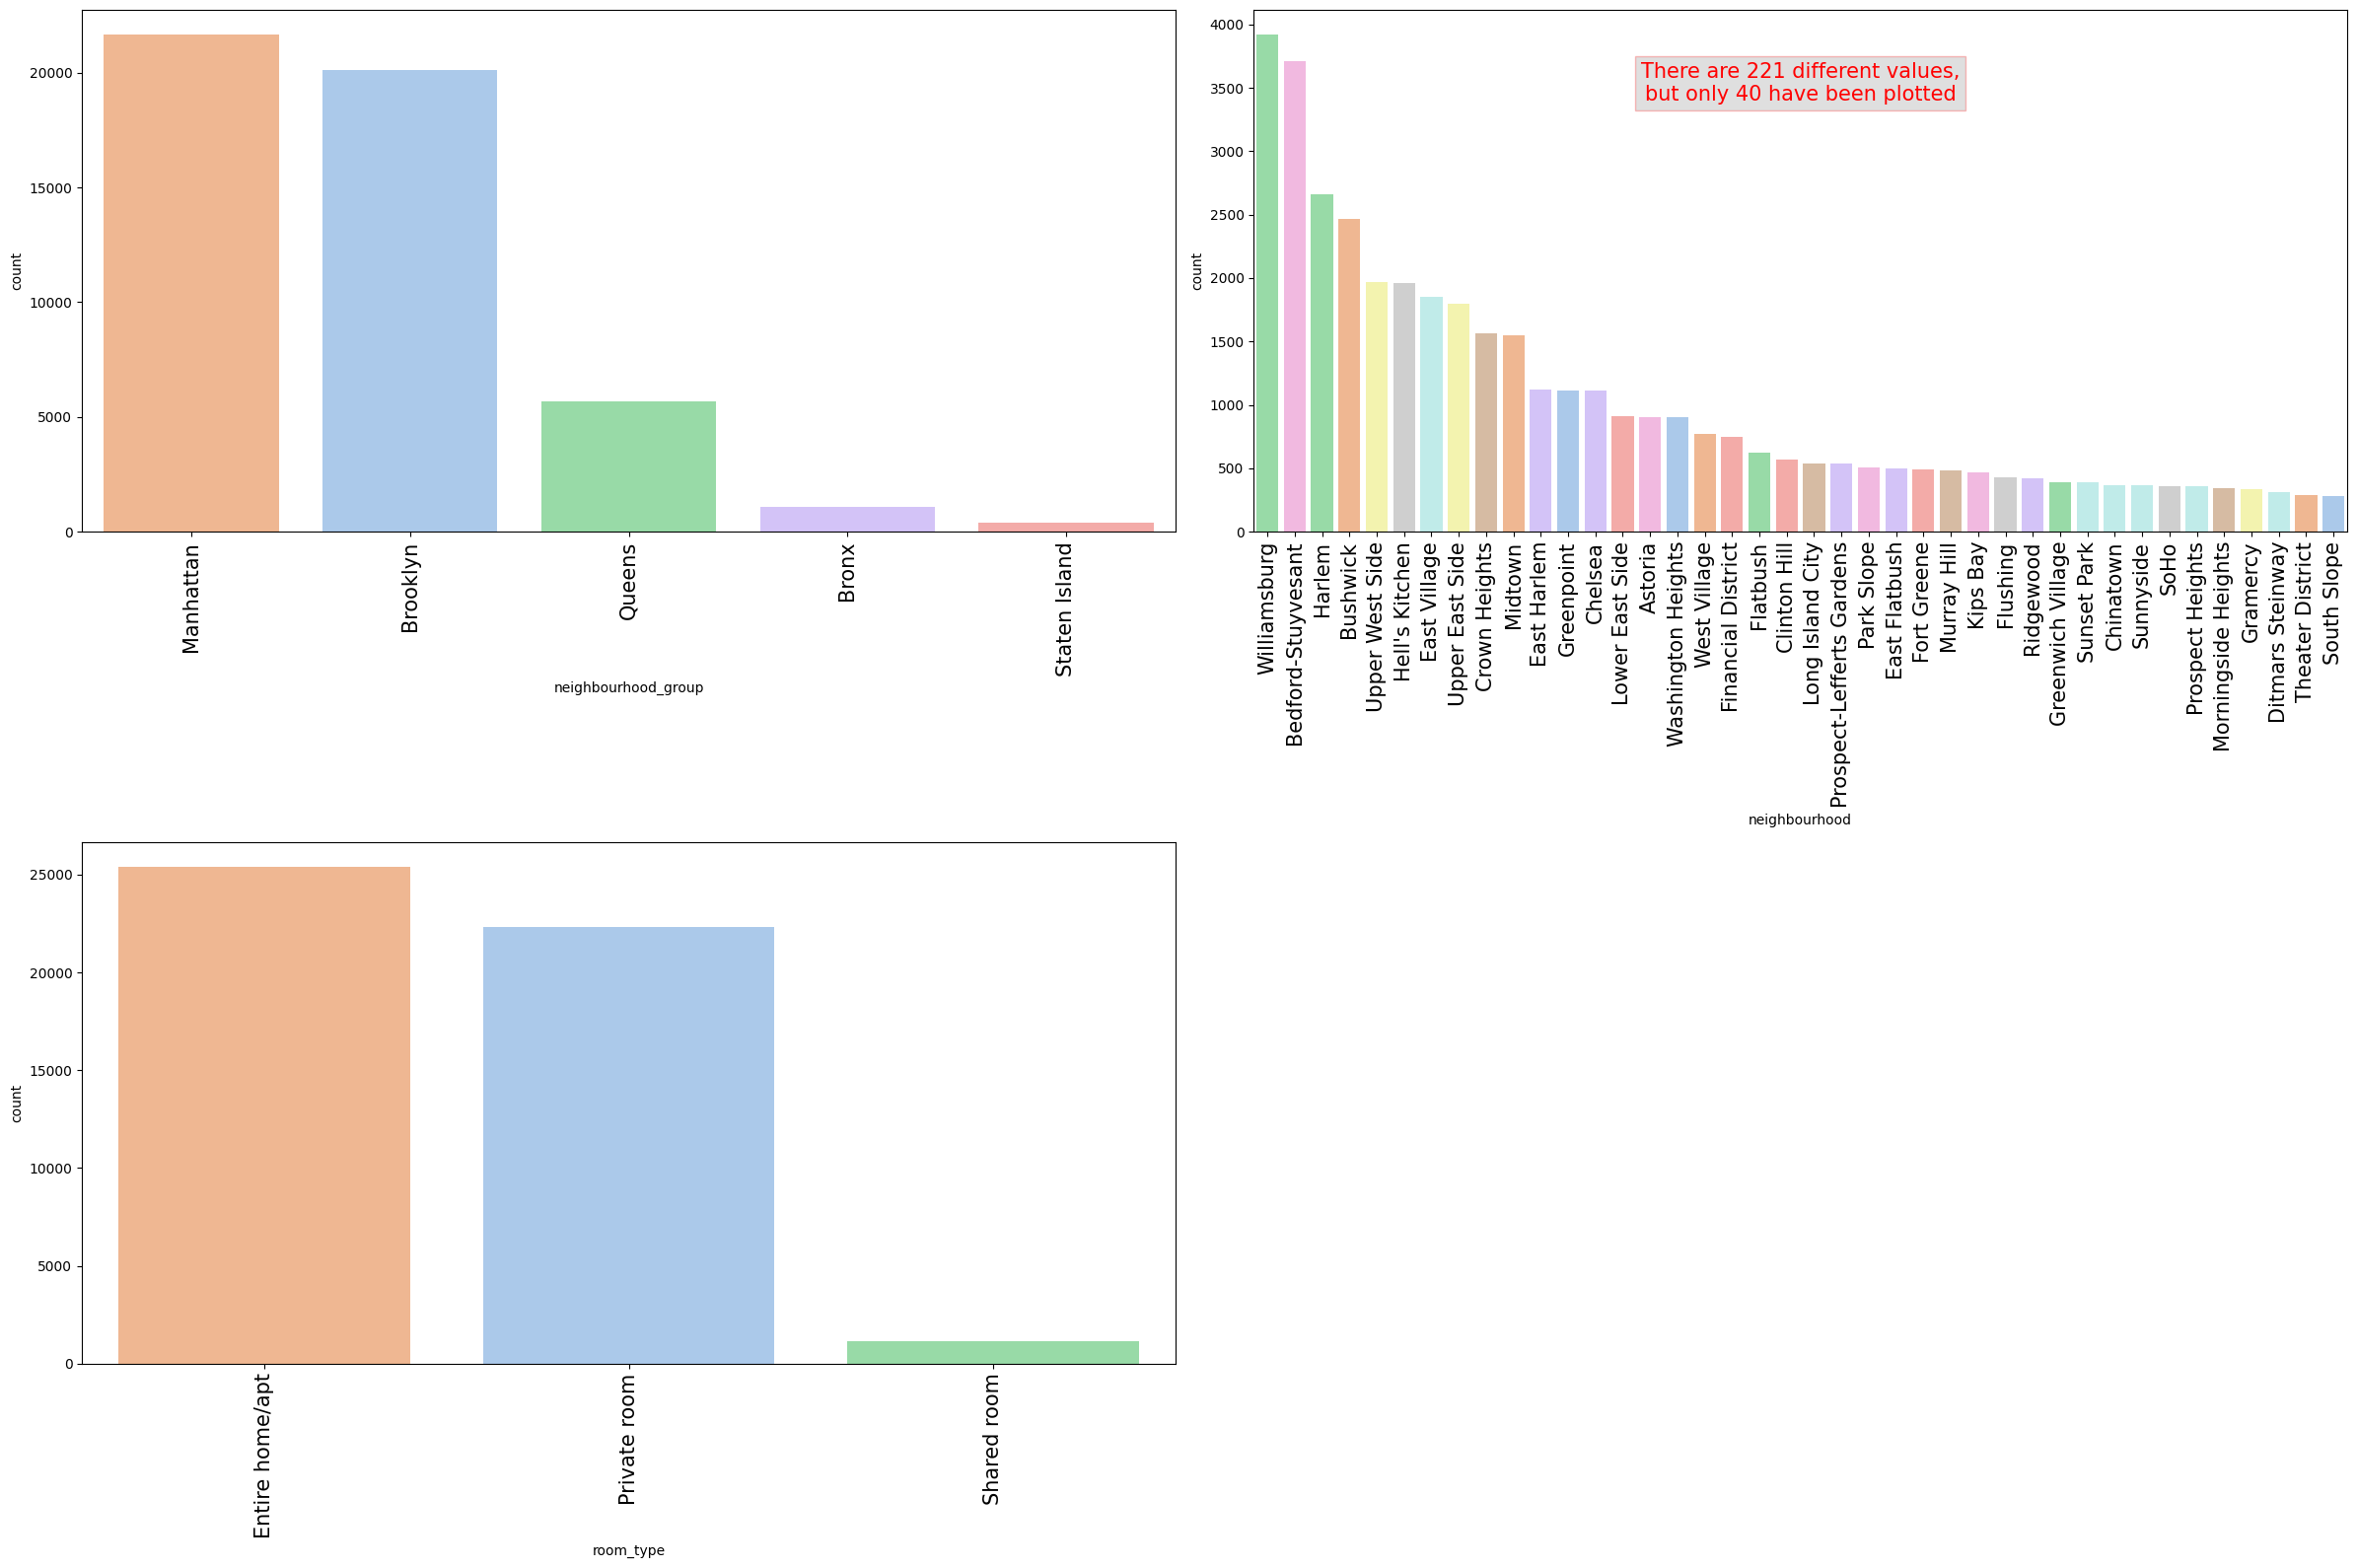

In [10]:
# STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var

# Copy  of previous DataFrame
df_S6_1 = df_S5.copy()

var_to_plot=category_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
)
    
# Flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:
    # Count unique values
    unique_count = df_S6_1[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S6_1[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S6_1[col].value_counts().index
    
    # Create countplot
    sns.countplot(
        ax = axes[idx],
        data = df_S6_1,
        x = col,
        hue = col,
        palette = my_palette,
        order = order,
        legend = False
    ).tick_params(axis='x', rotation=90, labelsize=my_font_size)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize=my_font_size,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

CONCLUSIONS:
- Most of the properties are in Manhattan or Brooklyn
- Most of the properties are entire home or private room

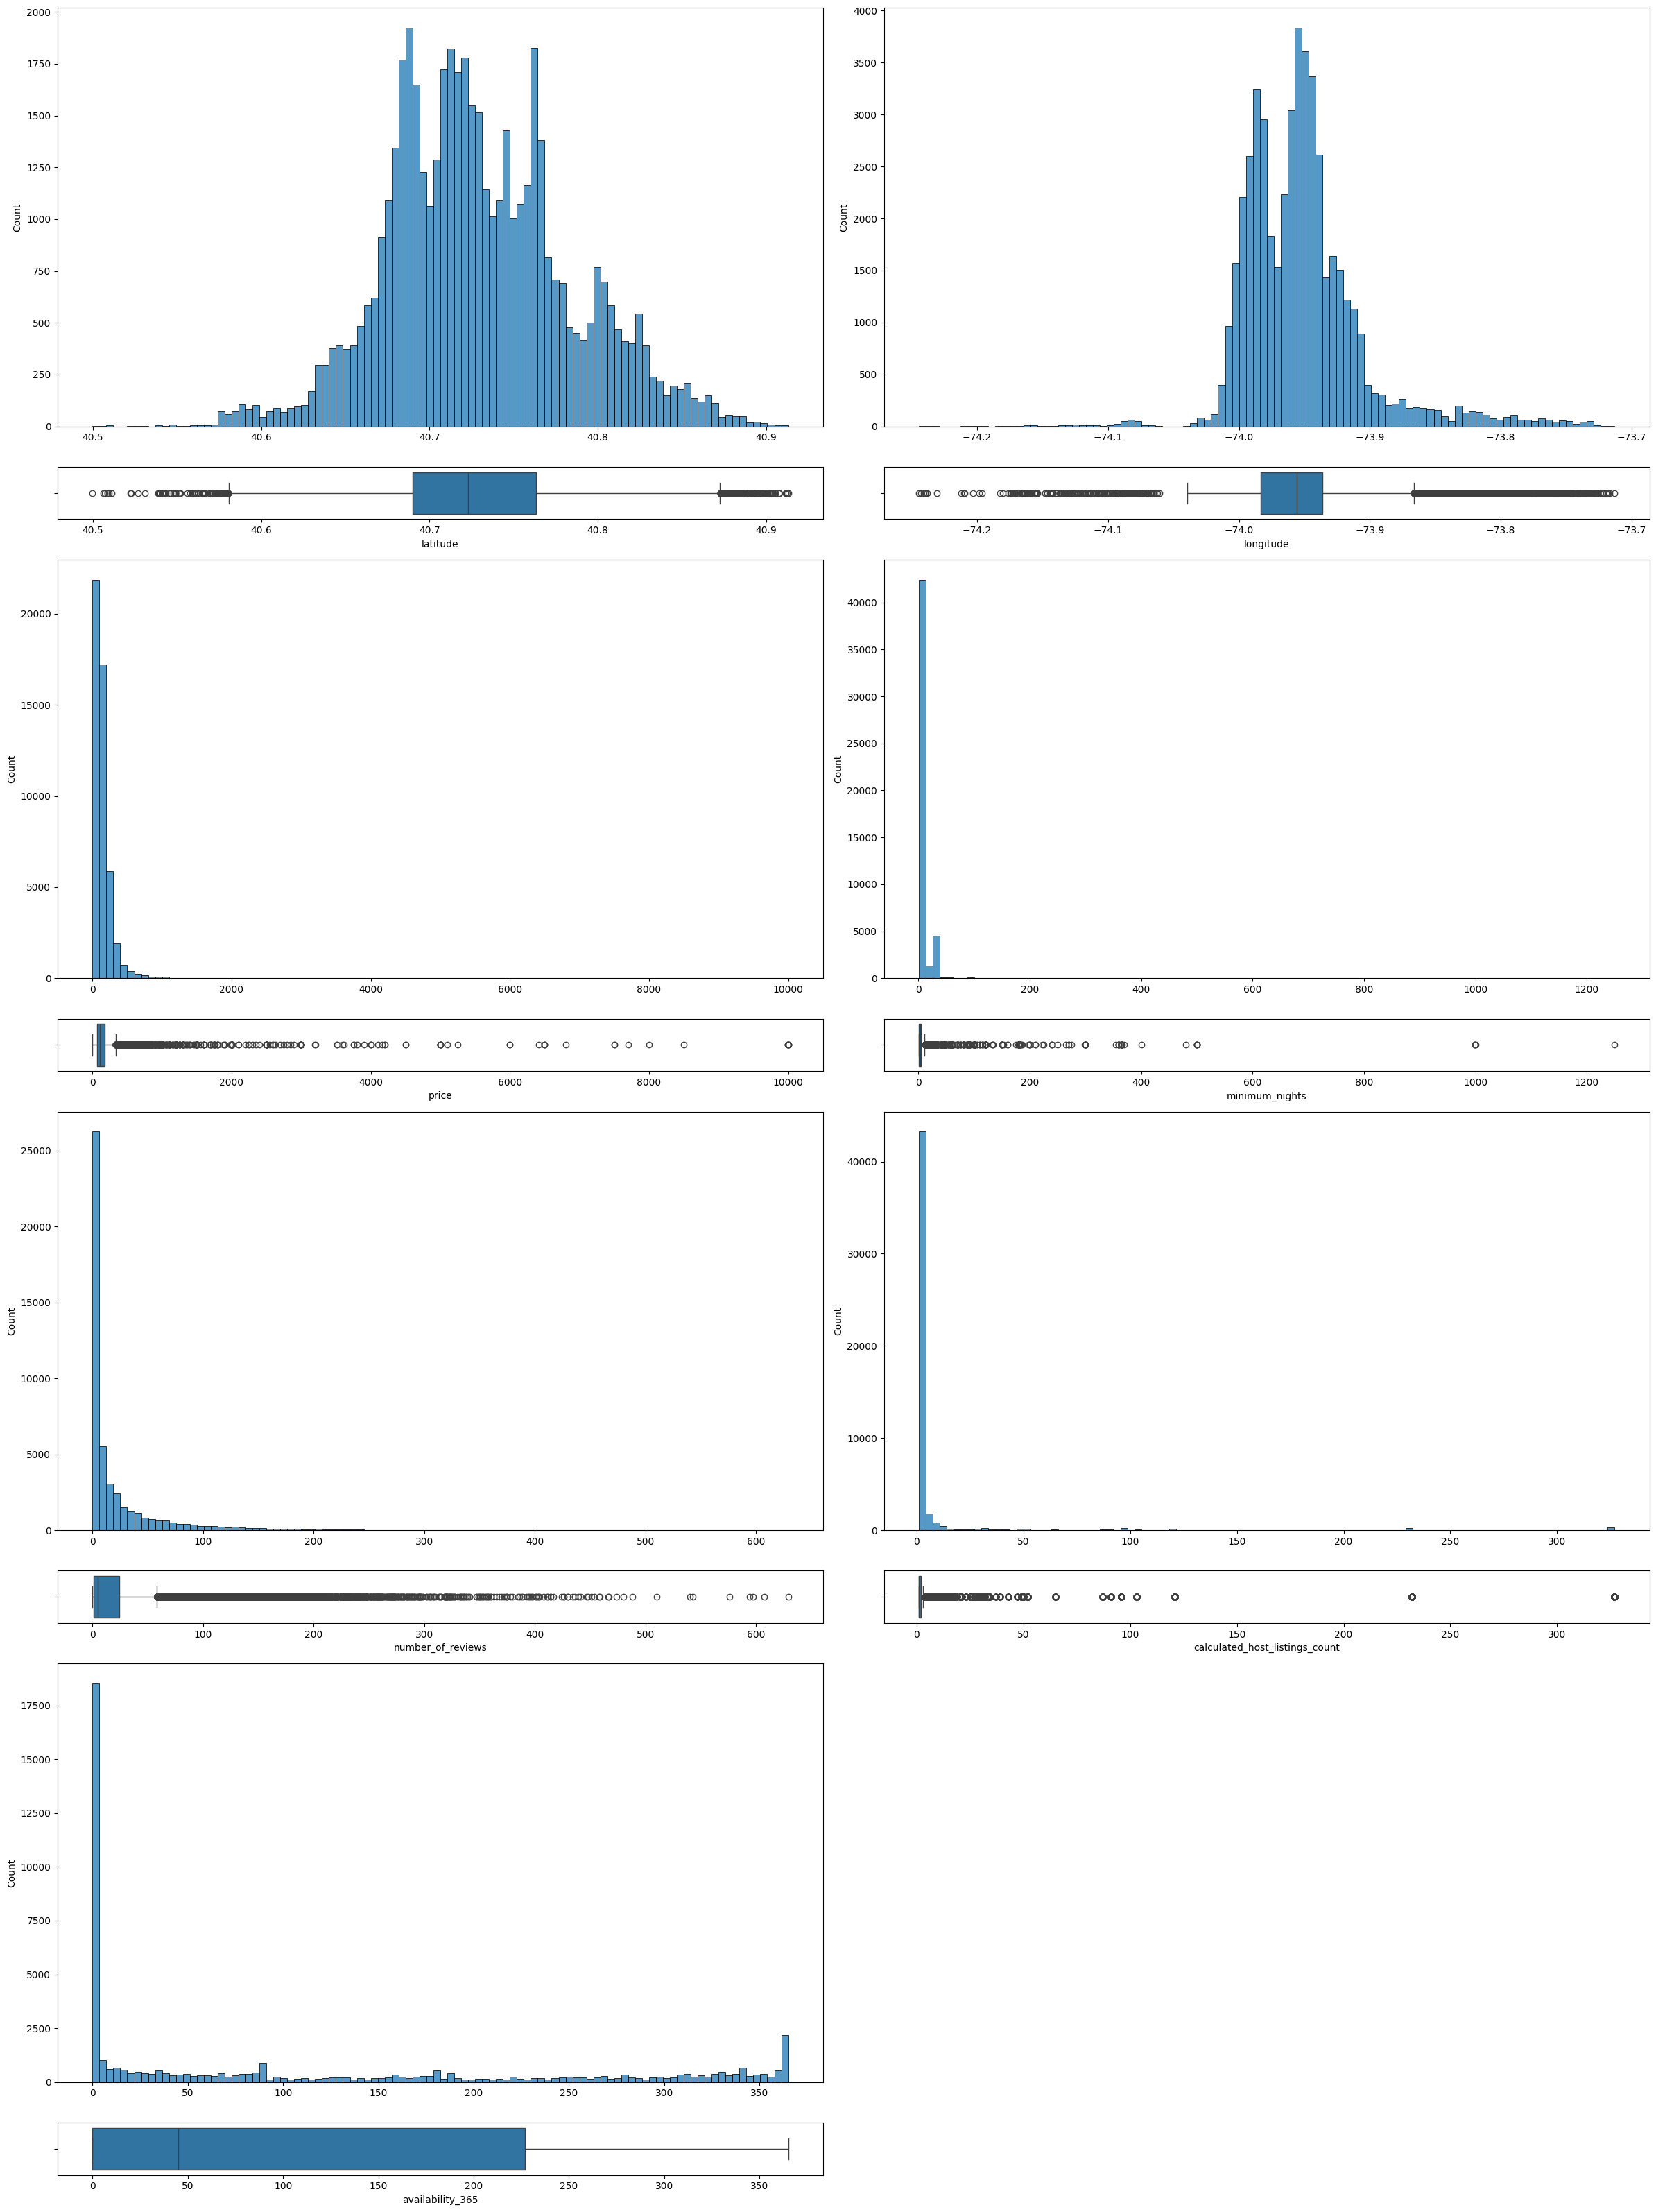

In [11]:
# STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var

# Copy  of previous DataFrame
df_S6_2 = df_S5.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols =  num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 0.5] * num_rows}
)

# Loop through variables
var_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if var_idx >= len(var_to_plot):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        # Histogram (top)
        sns.histplot(
            ax = axes[row * 2, col],
            data = df_S6_2,
            x = var_to_plot[var_idx],
            bins = num_bins
        ).set_xlabel("")

        # Boxplot (bottom)
        sns.boxplot(
            ax=axes[row * 2 + 1, col],
            data=df_S6_2,
            x = var_to_plot[var_idx]
        )
        var_idx += 1

# Adjust layout and display
plt.tight_layout()
plt.show()

CONCLUSIONS:
- Except for availabilty, the rest of the NUMERIC variables have a lot of outliers
- Most of the properties have availabily = 1 or 365 (one year prior)

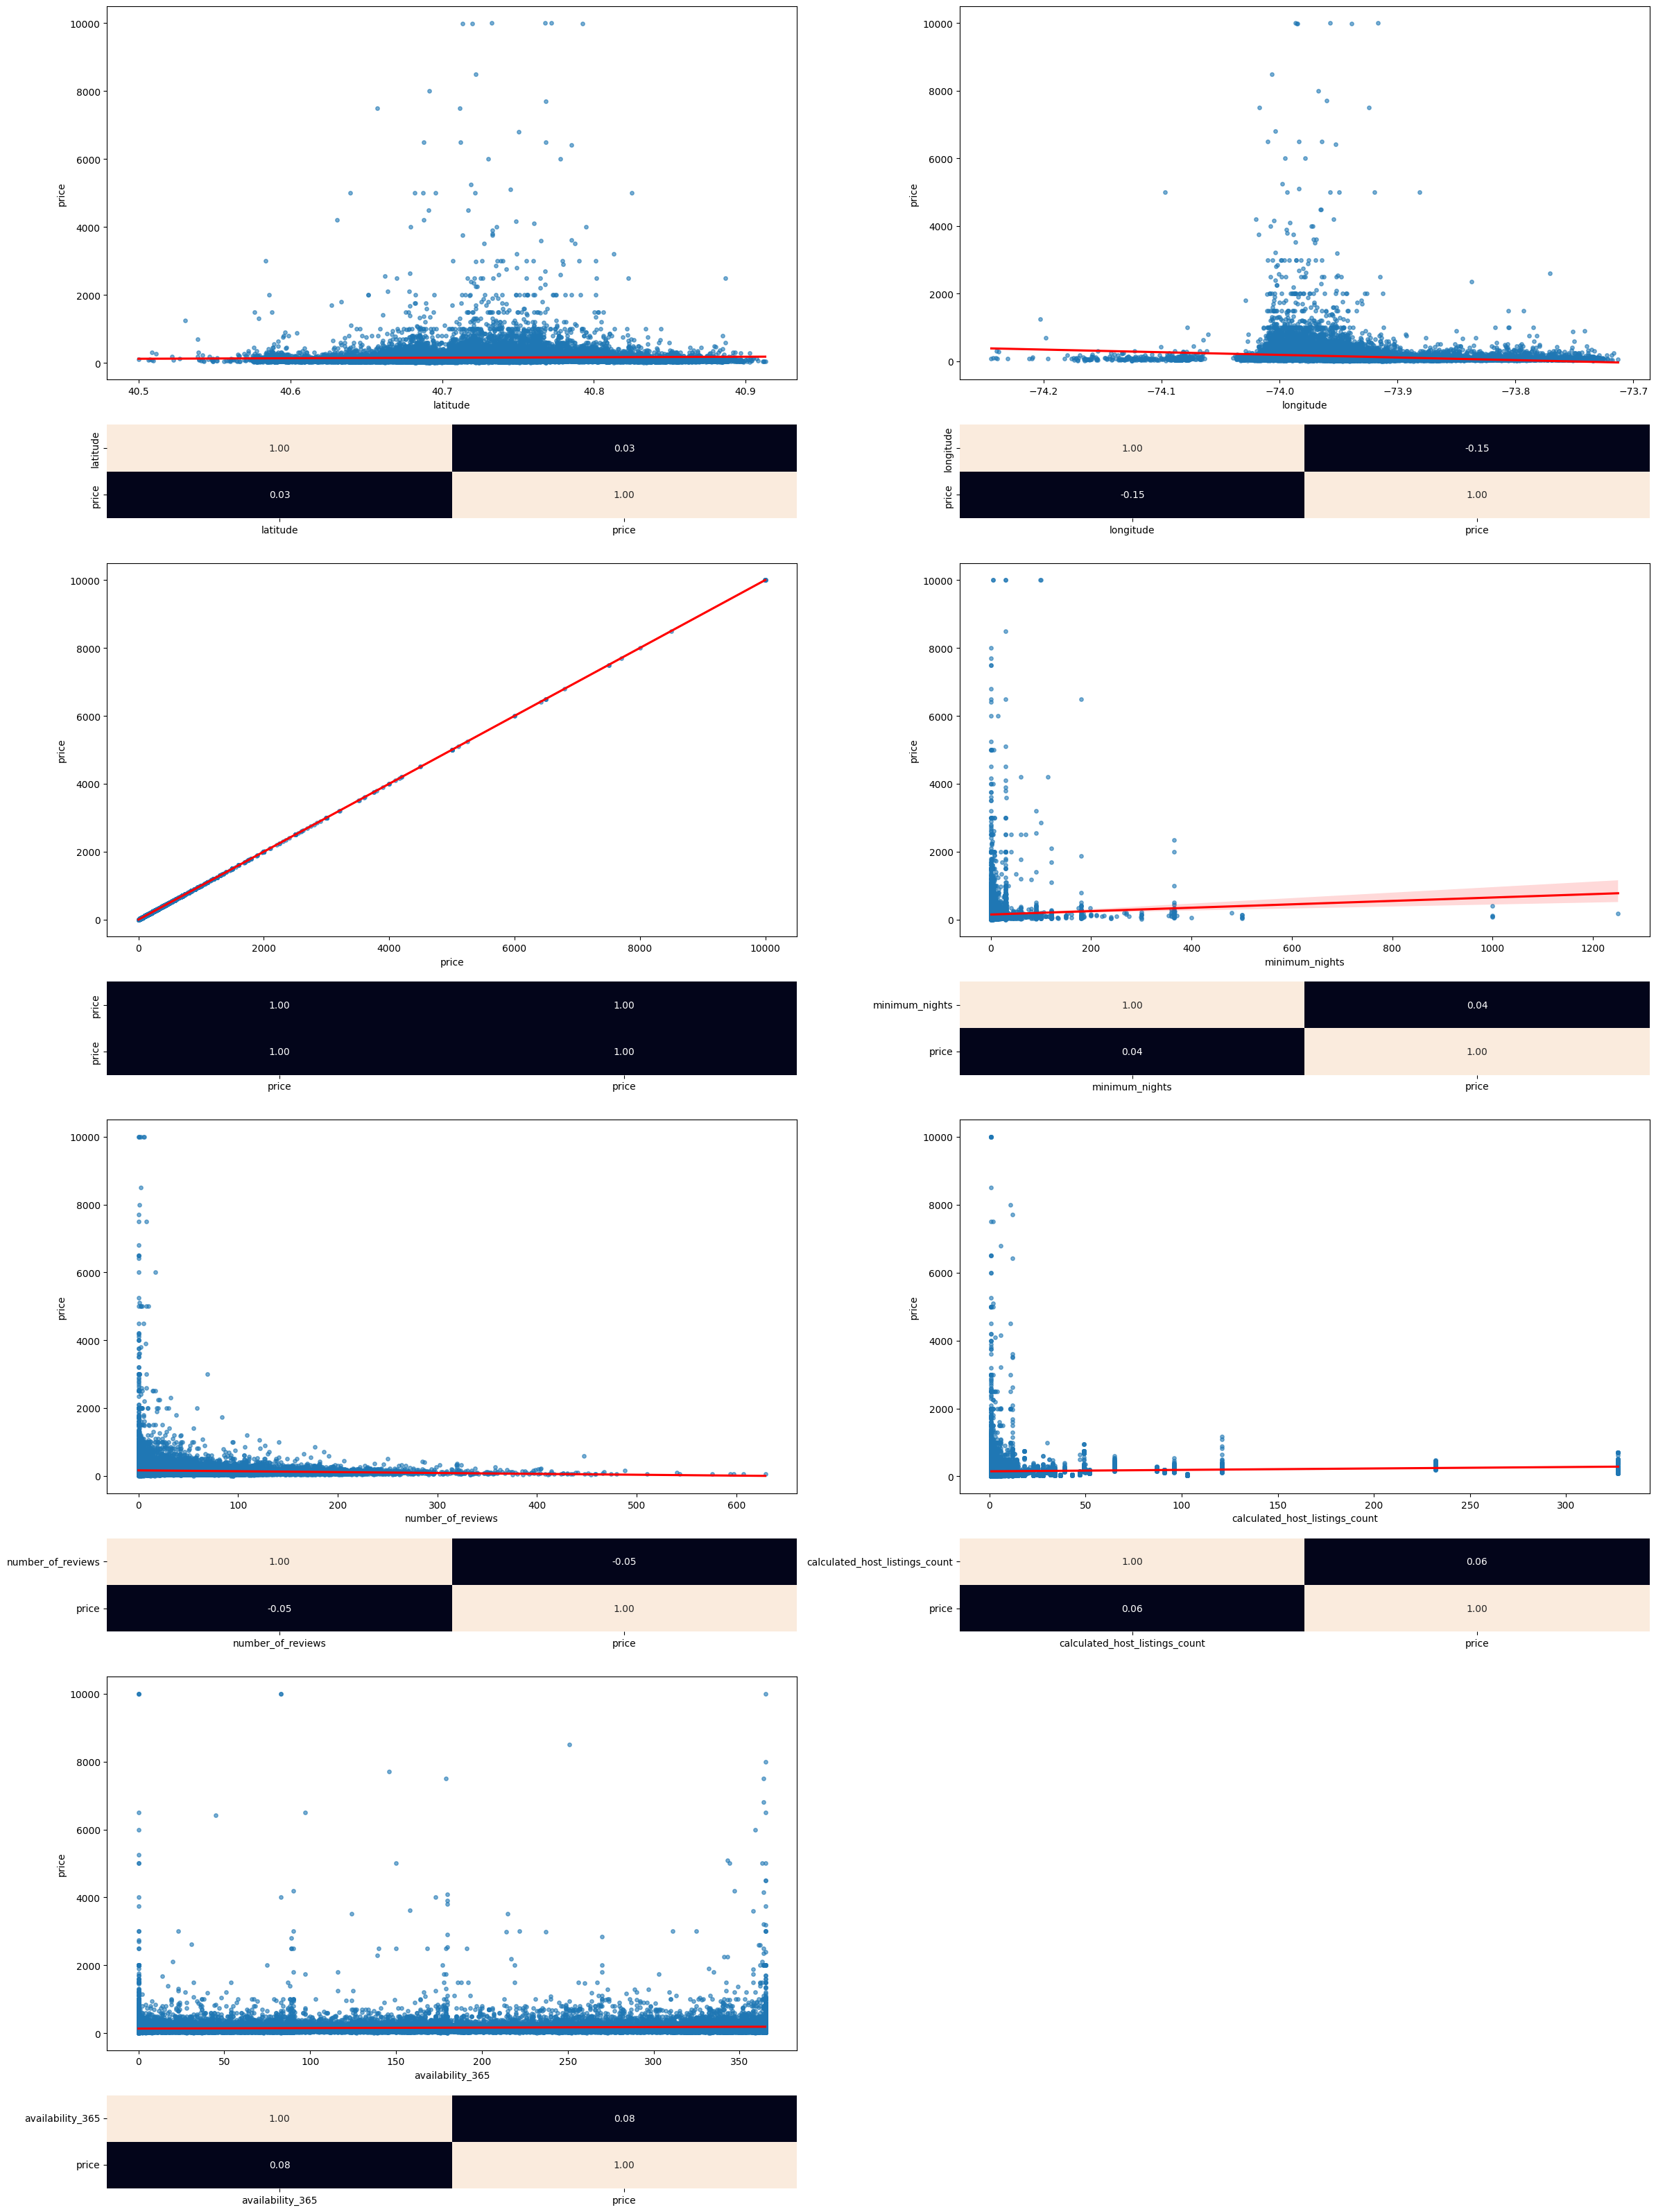

In [12]:
# STEP 7.1) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)

# Copy  of previous DataFrame
df_S7_1 = df_S5.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 1] * num_rows}
)

# Loop through variables
var_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if var_idx >= len(var_to_plot):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        # Regplot (top)
        sns.regplot(
            ax = axes[row * 2, col],
            data = df_S7_1,
            x = var_to_plot[var_idx],
            y = y_var,
            scatter_kws = {'s': my_font_size, 'alpha': 0.6},
            line_kws = {'color': 'red'}
        )

        # Boxplot (bottom)
        sns.heatmap(
            ax = axes[row * 2 + 1, col],
            data = df_S7_1[[var_to_plot[var_idx], y_var]].corr(),
            annot = True,
            fmt = ".2f",
            cbar = False
        )
        var_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

CONCLUSIONS:
- The only attribute that seems to have some degree of correlation with the price is the longitude, which makes sense. Location usually plays a key role in renting prices: expensive neighbourhoods VS affordable neighbourhoods

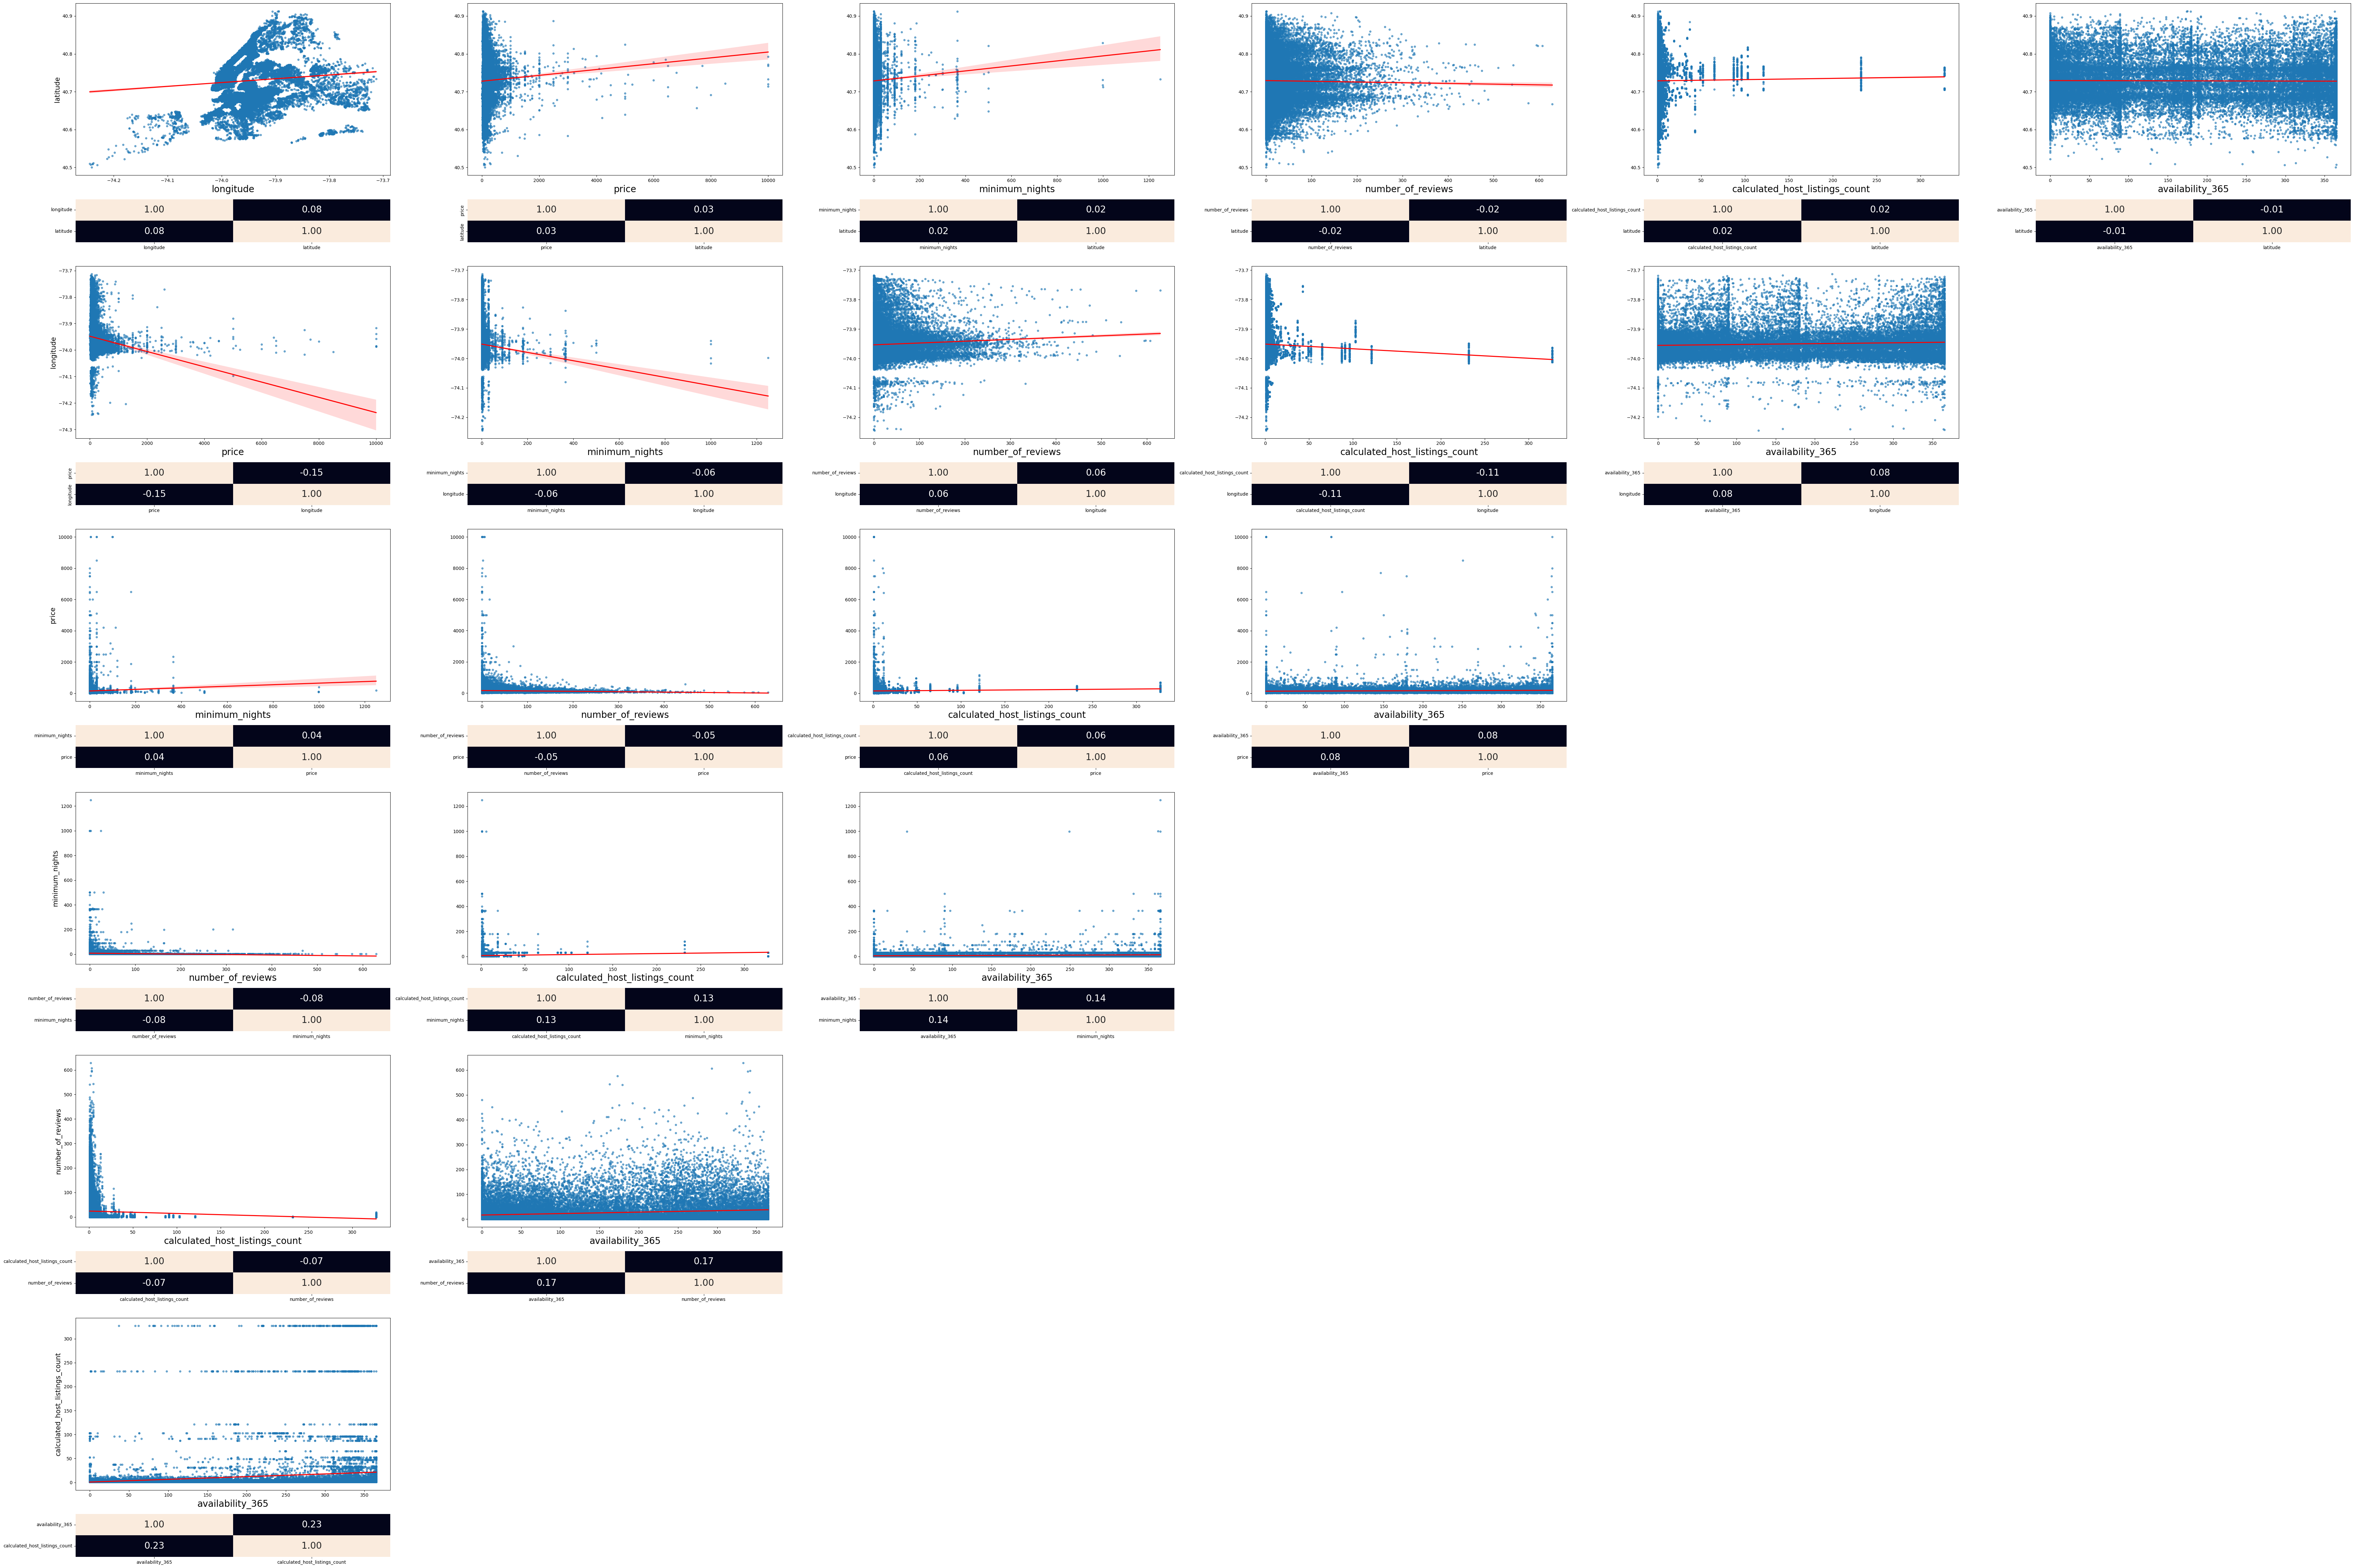

In [13]:
# STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)

# Copy  of previous DataFrame
df_S7_2 = df_S5.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = len(var_to_plot) - 1 # Number of rows (one less than number of variables)

# Create subplots with two stacked plots (regplot + heatmap) per variable pair
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols = len(var_to_plot) - 1,
    figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 1] * num_rows}
)

# Flatten axes for easy handling
axes = np.array(axes)

# Track subplot usage
for row in range(num_rows):
    n_cols = len(var_to_plot) - row - 1 # Decreasing number of columns each row
    for col in range(n_cols):

        # Top: regplot
        sns.regplot(
            ax = axes[row * 2, col],
            data = df_S7_2,
            x = var_to_plot[row + col + 1],
            y = var_to_plot[row],
            scatter_kws = {'s': my_font_size, 'alpha': 0.6},
            line_kws = {'color': 'red'}
        ).set_xlabel(var_to_plot[row + col + 1],fontsize=20)

        # Show Y label only for first plot in row
        if col == 0:
            axes[row * 2, col].set_ylabel(var_to_plot[row],fontsize=my_font_size)
        else:
            axes[row * 2, col].set_ylabel("")

        # Bottom: heatmap (correlation)
        sns.heatmap(
            ax = axes[row * 2 + 1, col],
            data = df_S7_2[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
            annot = True,
            fmt = ".2f",
            cbar = False,
            annot_kws = {"size": 20}
        )

    # Hide unused subplots on the right for this row
    for col in range(n_cols, len(var_to_plot) - 1):
        axes[row * 2, col].set_visible(False)
        axes[row * 2 + 1, col].set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()

CONCLUSIONS:
- Plotting latitude VS longitude obviously draws a map
- Longitude has some degree of negative correlation with price is because location usually plays a key role in renting prices: the further we are from the most crowded areas, the cheaper it gets
- Calculated host listing counts has some degree of correlation with longitude, probabily because the further we are from Manhattan and Brokklyn (where most of properties are), the easier is for someone to have muti-properties (less expensive areas to buy)
- Calculated host listing counts has some degree of positive correlation with min_nights, probabily because owners tend to set more min_nights the higher the number of properties they have (easier management of assets)
- Availabilty and num_reviews have some degree of positive correlation, probably because the more reviews it gets, more attracts people, more exclusive it gets (higher number of days to get available
- Availabilty and calculated host listing counts have a noticeable degree of positive correlation, probably because multi-property owners have better and more professional management of the properties, which leads to higher number of clients, which leads to higher number of days to fet available

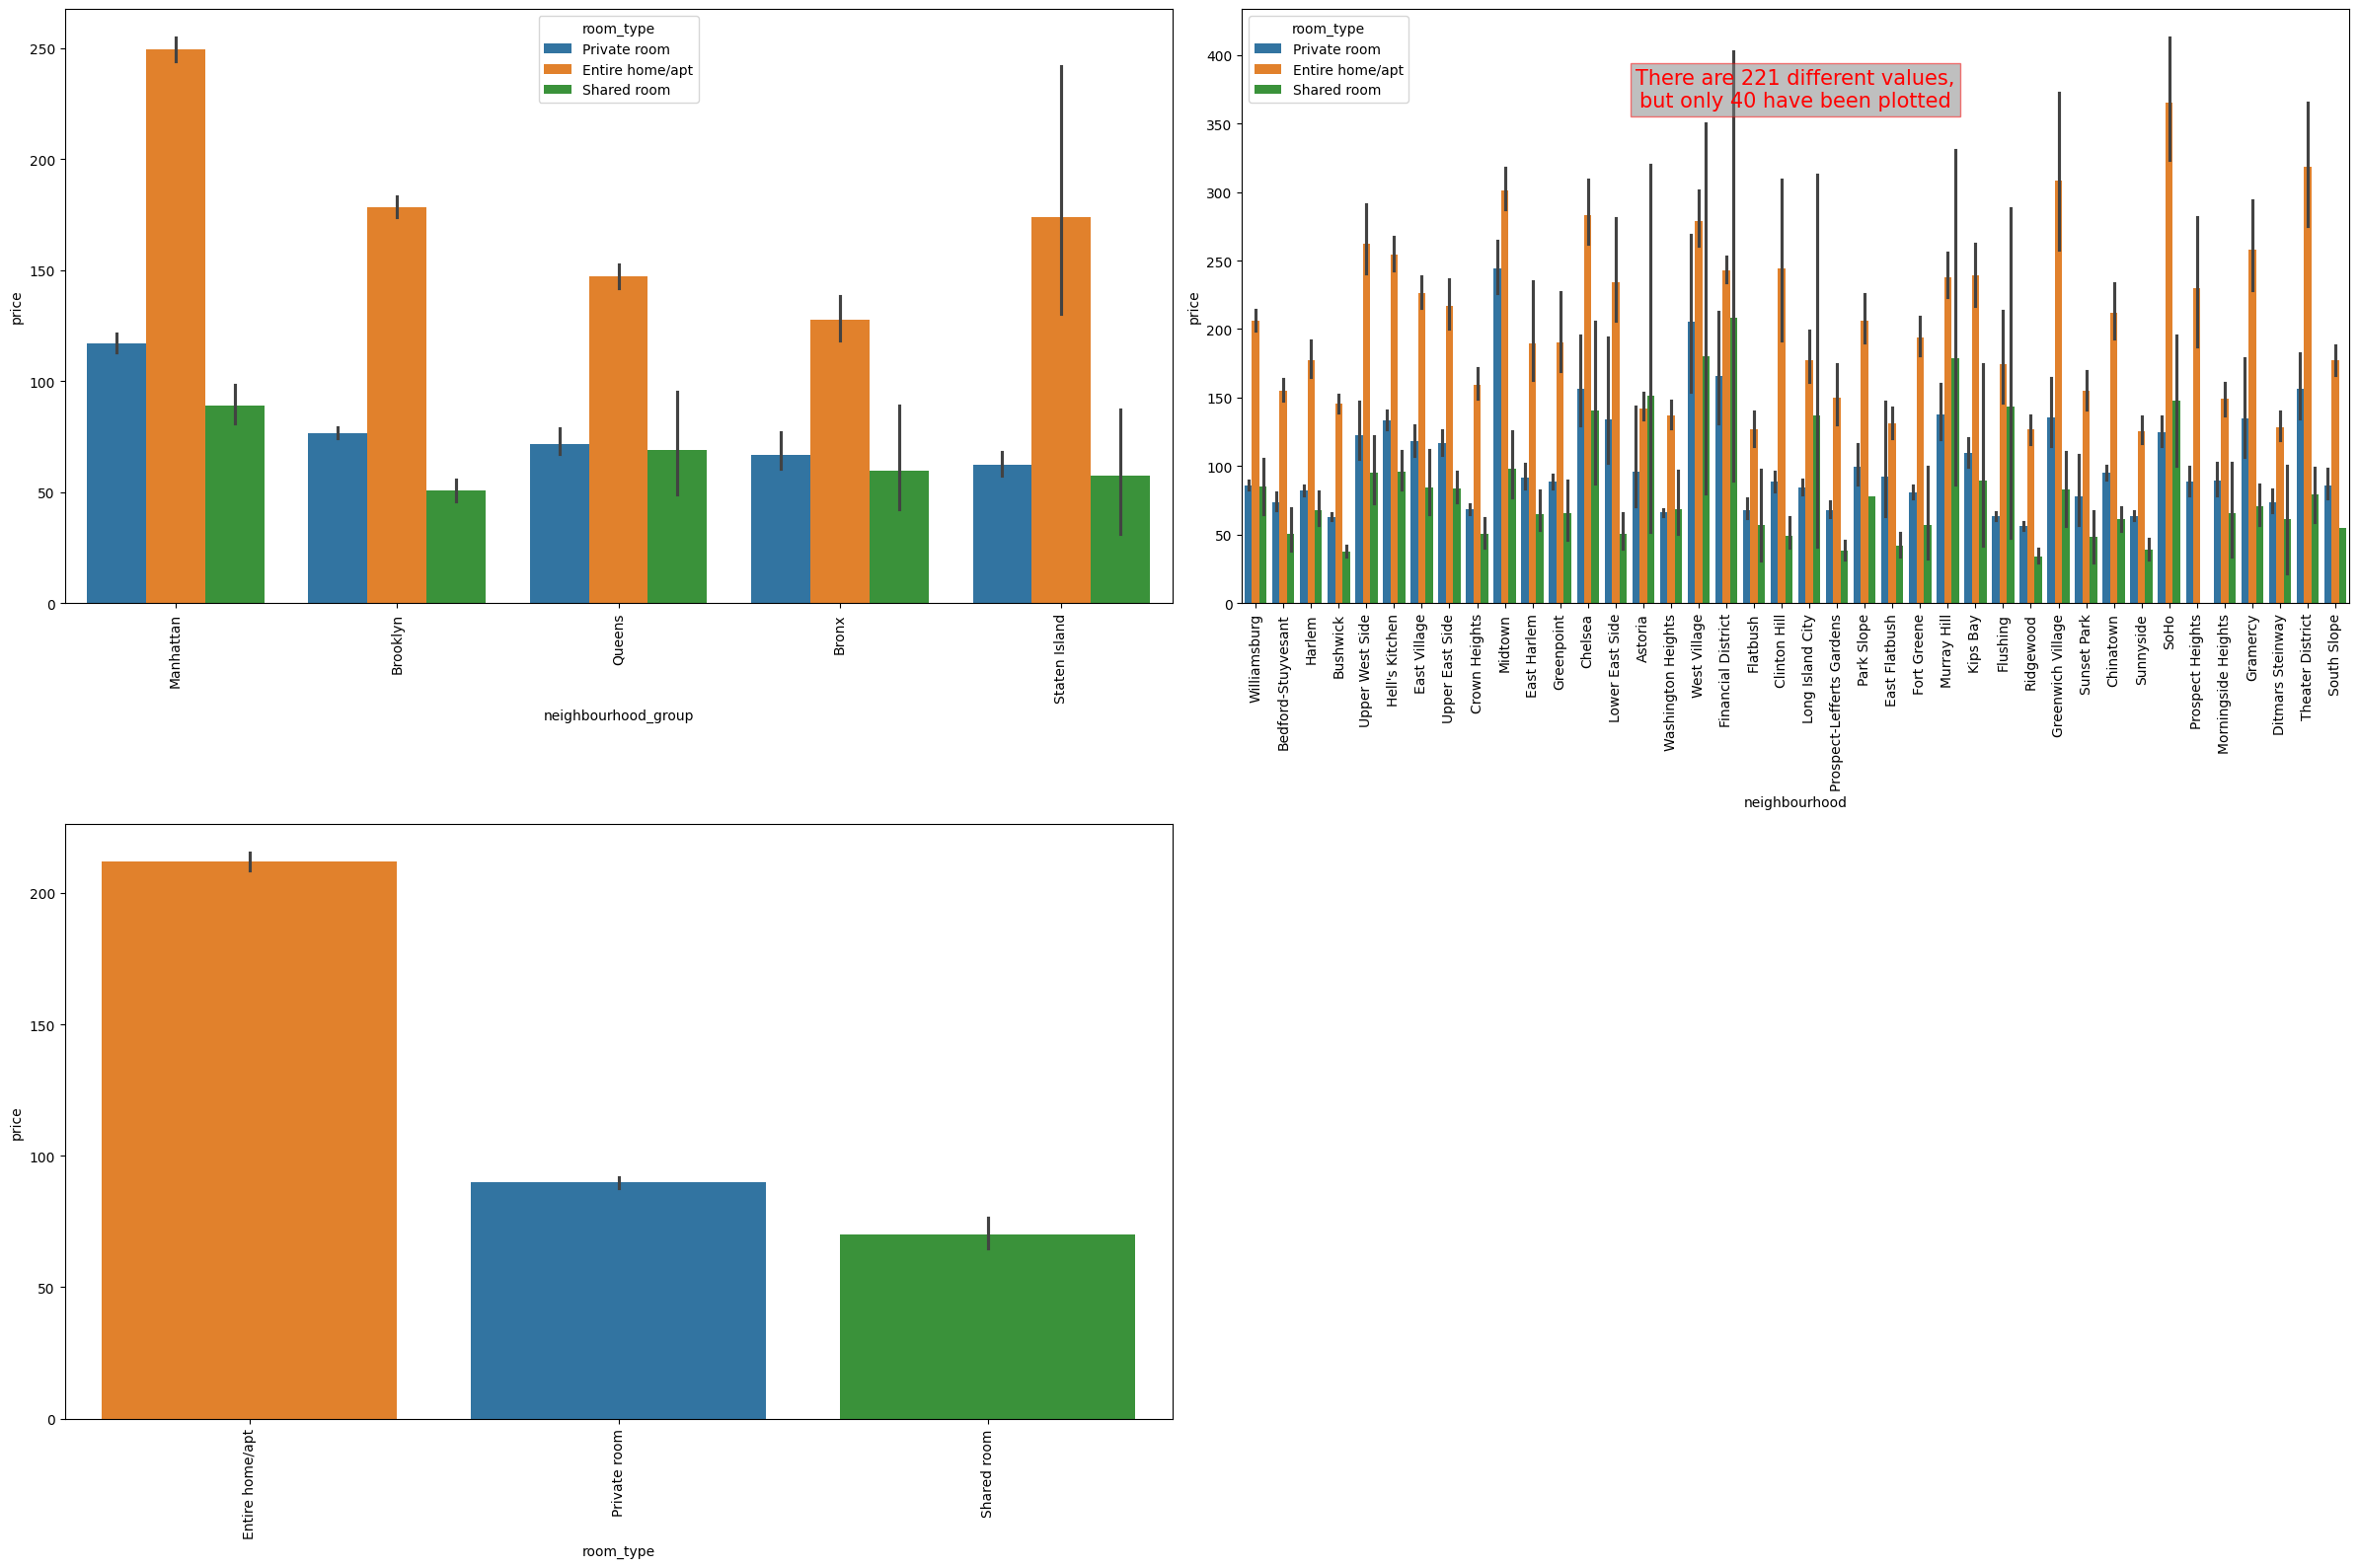

In [14]:
# STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)

# Copy  of previous DataFrame
df_S7_3 = df_S5.copy()

# Category var to combine
cat_var_comb = "room_type"

var_to_plot=category_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows)
)

# flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:

    # Count unique values
    unique_count = df_S7_3[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S7_3[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S7_3[col].value_counts().index
    
    # Create barplot
    sns.barplot(
        ax=axes[idx],
        data = df_S7_3,
        x = col,
        y = y_var,
        hue = cat_var_comb,
        order = order,
        ).tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize = my_font_size,
            color = 'red',
            ha = 'center',
            va = 'top',
            bbox = dict(facecolor='grey', alpha=0.5, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

CONCLUSIONS:
- The average price of entire home/app is the highest type in every group. Private room is always the second highest type, being shared-room the last. It makes sense
- The variance of prices for entire home/app in Staten Island is wide, it is much narrow in Manhattan (probably a mature market -> stedier prices)
- Queen, Bronx and Staten Island present a lot of variance in shared rooms

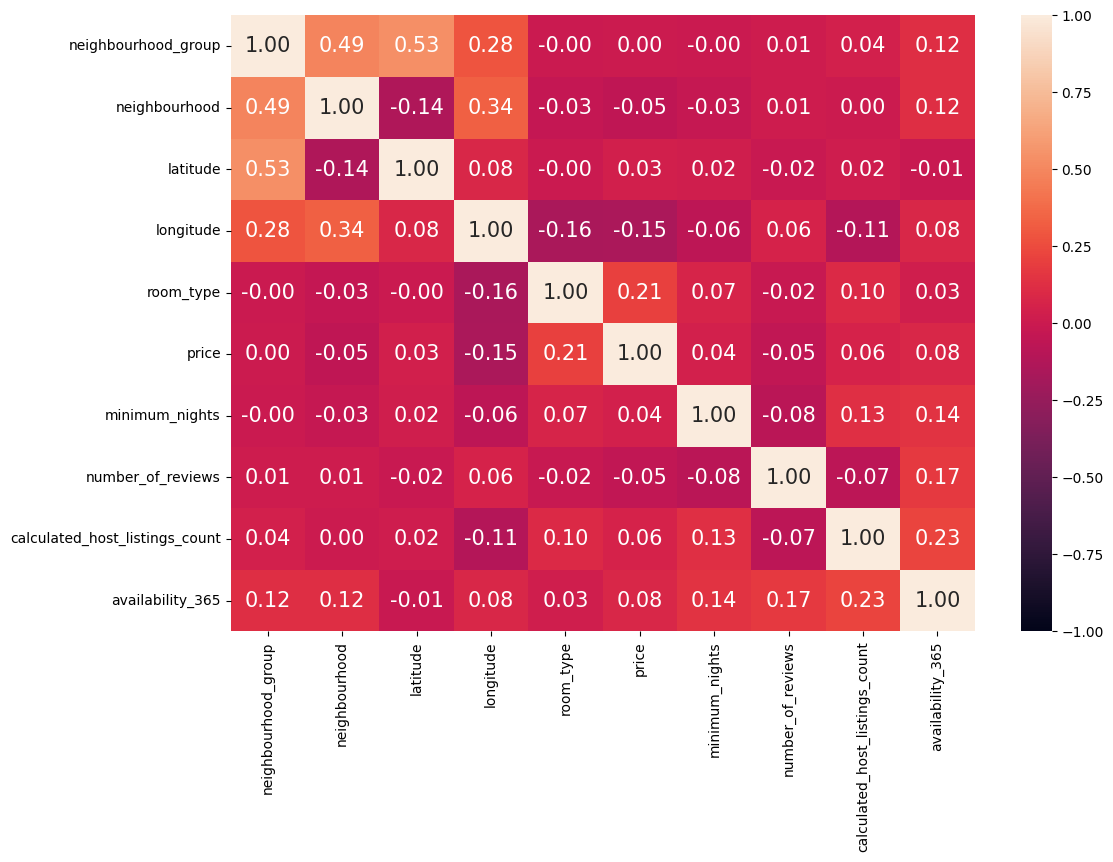

<Figure size 1200x800 with 0 Axes>

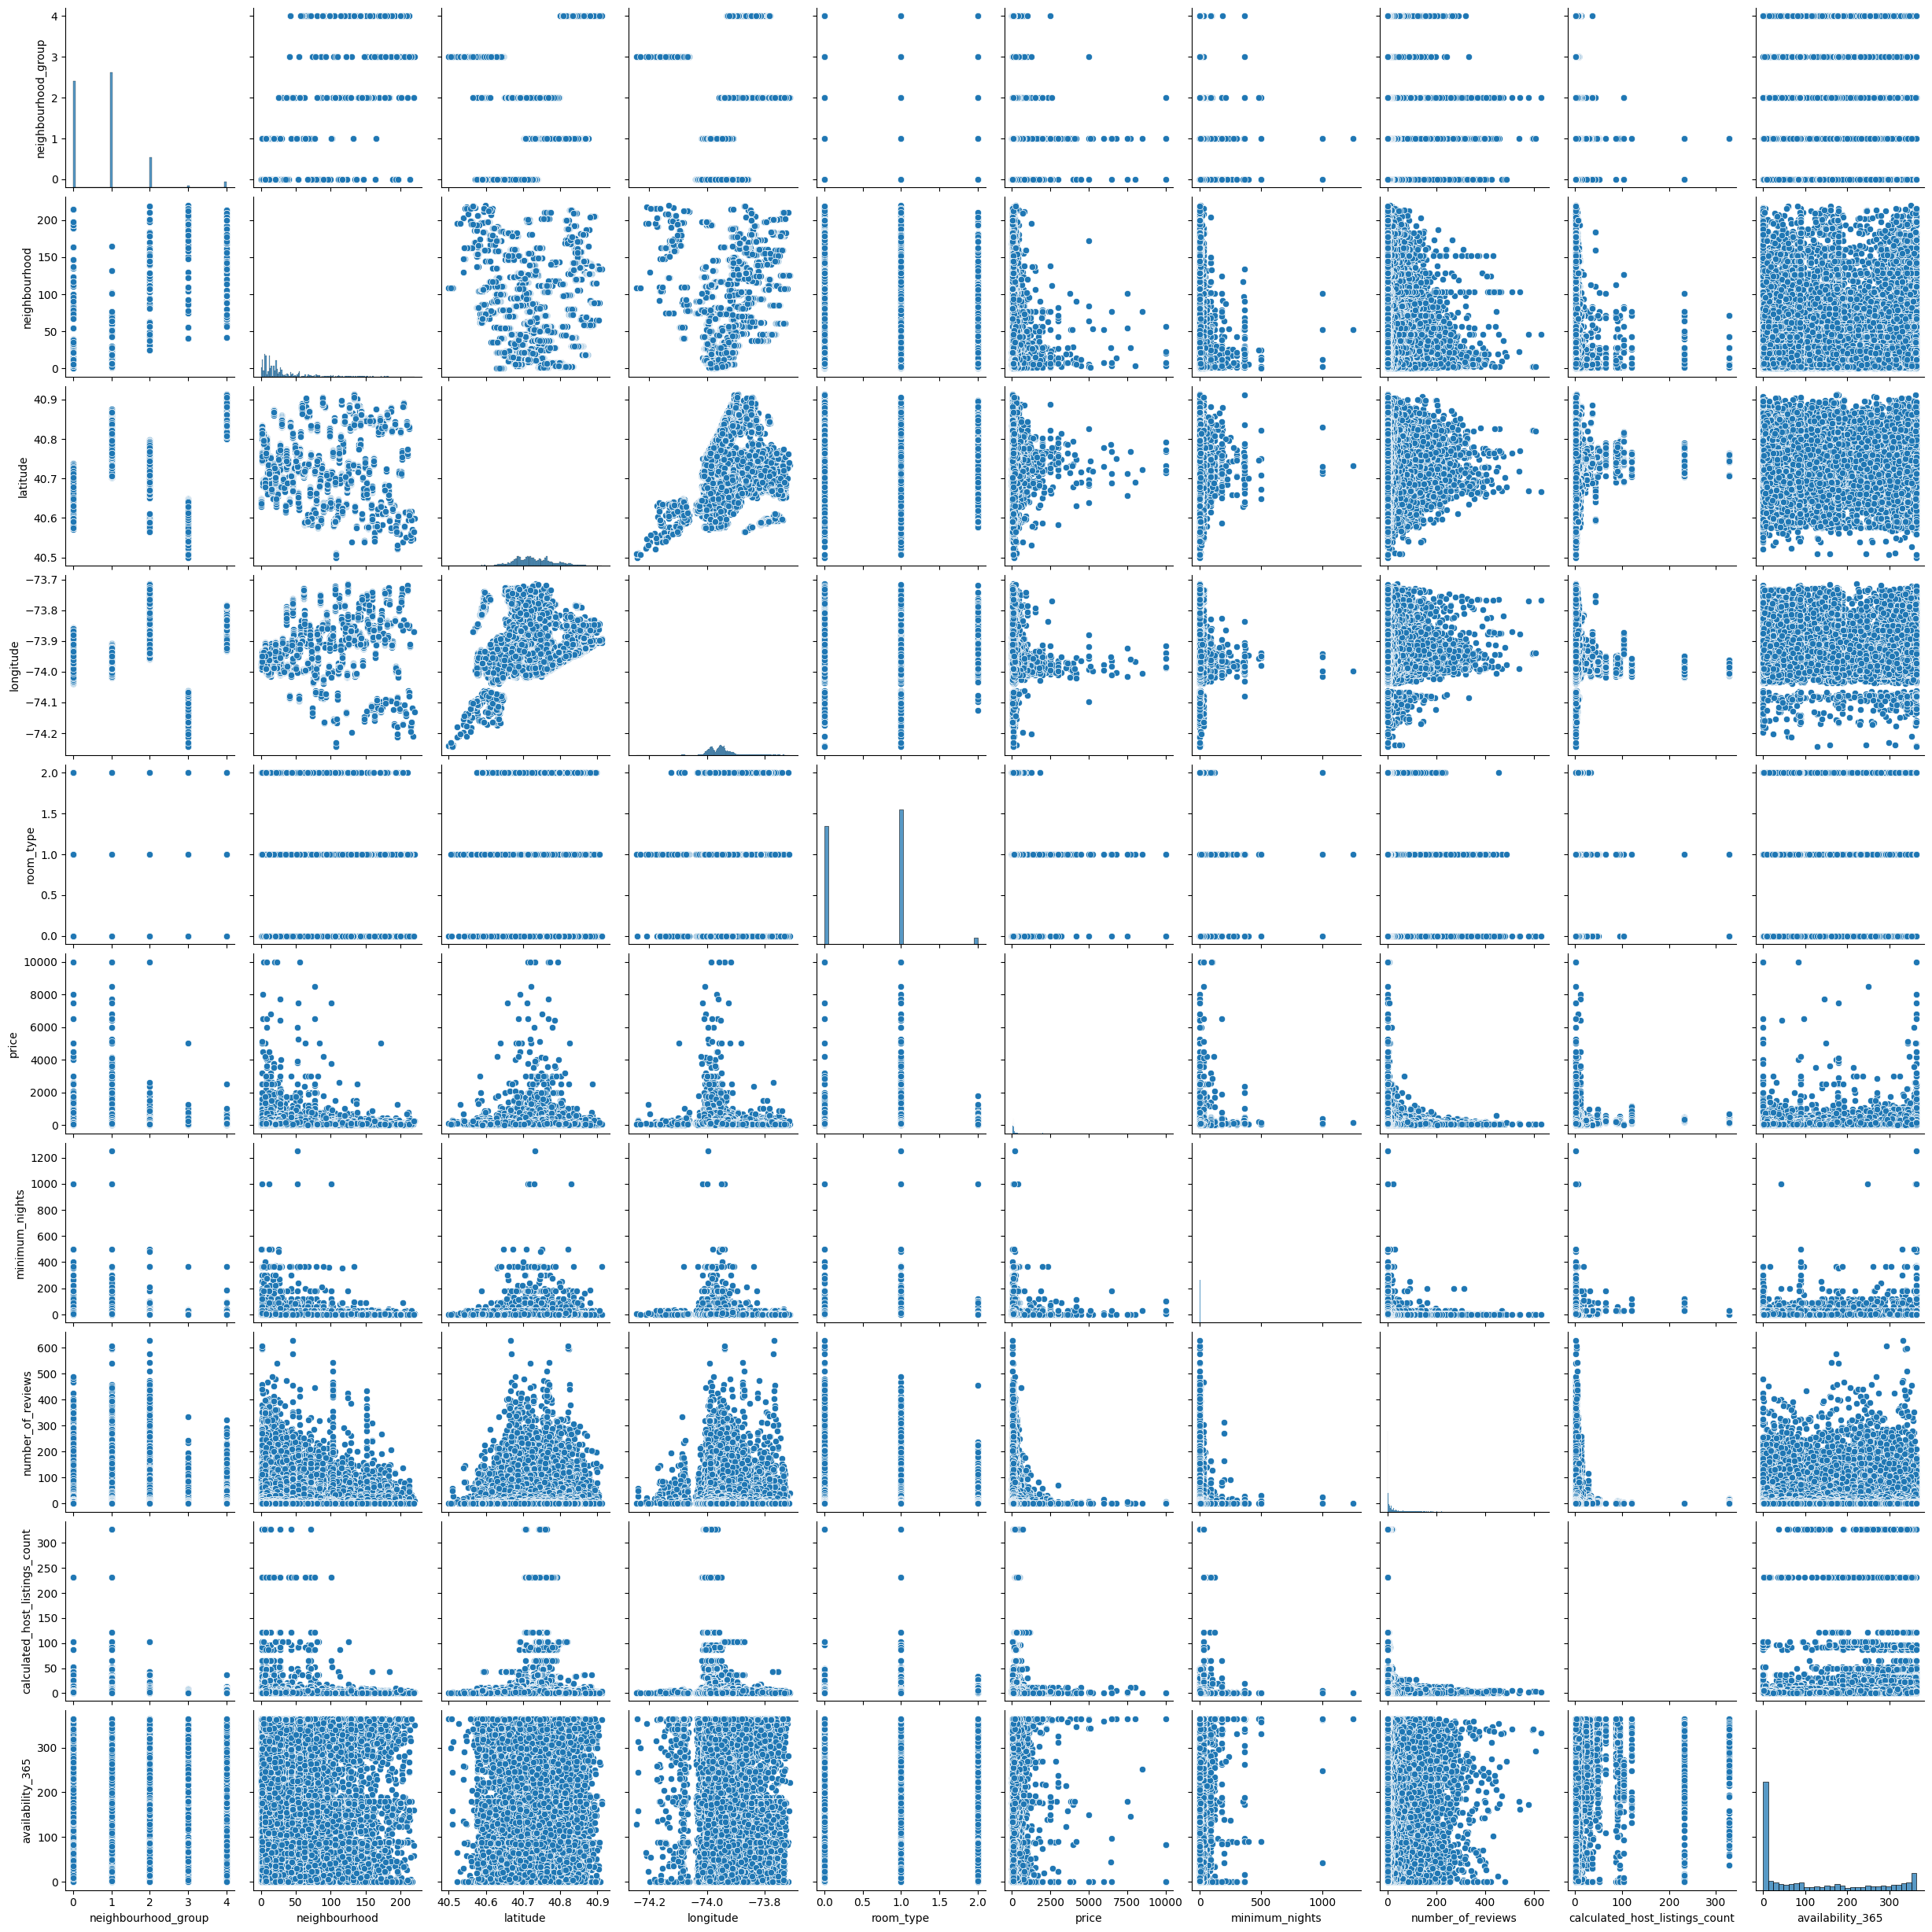

In [15]:
# STEP 7.4) MULTIVARIANT ANALYIS - GLOBAL (Heatmap + Pairplot)

# Copy  of previous DataFrame
df_S7_4 = df_S5.copy()

var_to_plot=category_var # Variable type for this plot

# Encode categorical variables using the Series.factorize() method
for col in var_to_plot:
    codes, uniques = df_S7_4[col].factorize()
    df_S7_4[col] = codes  # replace column with integer codes

# Create Plot
fig = plt.figure(
    figsize=(figWidth_unit,figHeight_unit)
)

# Glboal heatmap
sns.heatmap(
    data = df_S7_4.corr(),
    annot = True,
    vmin = -1,
    vmax = 1,
    fmt = ".2f",
    annot_kws = {"size": my_font_size}
        )
# Display
plt.show()

# Create Plot
fig = plt.figure(
    figsize=(figWidth_unit,figHeight_unit)
)

# Create pairplot
sns.pairplot(
    data = df_S7_4
)

# Display
plt.show()

CONCLUSIONS:
- All geographical categories (longitude, latitude, neighbourhood and neighbourhood_group) hold a some correlation, it makes sense
- Room_type and price as well, make sense as we have seen previously
- Other correlations have been explained before

In [16]:
# STEP 8.1) DEFINE OUTLIERS

# Copy  of previous DataFrame
df_S8_1=df_S5.copy()

# Print info
display(df_S8_1.describe())

# Include target variable y as part of the numeric list
if y_var not in numeric_var:
    cols = numeric_var + [y_var]
else:
    cols = numeric_var

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []
extreme_lower_limits = []
extreme_upper_limits = []
n_extreme_outliers_lower = []
n_extreme_outliers_upper = []
pct_extreme_outliers_lower = []
pct_extreme_outliers_upper = []

len(df_S8_1.index)

for col in cols:
    Q1 = df_S8_1[col].quantile(0.25)
    Q3 = df_S8_1[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Count num of outliers
    n_low = (df_S8_1[col] < lower).sum()
    n_high = (df_S8_1[col] > upper).sum()
    n_extreme_low = (df_S8_1[col] < extreme_lower).sum()
    n_extreme_high = (df_S8_1[col] > extreme_upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S8_1.index)) * 100
    pct_high = (n_high / len(df_S8_1.index)) * 100
    pct_extreme_low = (n_extreme_low / len(df_S8_1.index)) * 100
    pct_extreme_high = (n_extreme_high / len(df_S8_1.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)
    extreme_lower_limits.append(extreme_lower)
    extreme_upper_limits.append(extreme_upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)
    n_extreme_outliers_lower.append(n_extreme_low)
    n_extreme_outliers_upper.append(n_extreme_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)
    pct_extreme_outliers_lower.append(pct_extreme_low)
    pct_extreme_outliers_upper.append(pct_extreme_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
df_extreme_limits = pd.DataFrame(
    [
        extreme_lower_limits,
        extreme_upper_limits,
        n_extreme_outliers_lower,
        n_extreme_outliers_upper,
        pct_extreme_outliers_lower,
        pct_extreme_outliers_upper
    ],
    columns=cols,
    index=[
        "extreme_lower_limit",
        "extreme_upper_limit",
        "n_extreme_outliers_lower",
        "n_extreme_outliers_upper",
        "pct_extreme_outliers_lower",
        "pct_extreme_outliers_upper"
    ]
)
# Display results
display(df_limits)
display(df_extreme_limits)

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean           23.274466                        7.143982        112.781327  
std            44.550582                       32.952519        131.622289  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000          0.000000  
50%             5.000000                        1.000000         45.000000  
75%            24.000000                        2.000000        227.000000  
max           629.000000                      327.000000        365.000000

latitude    longitude        price  minimum_nights  \
lower_limit          40.580578   -74.053263   -90.000000       -5.000000   
upper_limit          40.872637   -73.866082   334.000000       11.000000   
n_outliers_lower    171.000000   373.000000     0.000000        0.000000   
n_outliers_upper    254.000000  2460.000000  2972.000000     6607.000000   
pct_outliers_lower    0.349729     0.762859     0.000000        0.000000   
pct_outliers_upper    0.519481     5.031189     6.078331       13.512629   

                    number_of_reviews  calculated_host_listings_count  \
lower_limit                -33.500000                       -0.500000   
upper_limit                 58.500000                        3.500000   
n_outliers_lower             0.000000                        0.000000   
n_outliers_upper          6021.000000                     7081.000000   
pct_outliers_lower           0.000000                        0.000000   
pct_outliers_upper          12.314143                       14.482053   

                    availability_365  
lower_limit                   -340.5  
upper_limit                    567.5  
n_outliers_lower                 0.0  
n_outliers_upper                 0.0  
pct_outliers_lower               0.0  
pct_outliers_upper               0.0

latitude   longitude        price  \
extreme_lower_limit         40.471055  -74.123455  -249.000000   
extreme_upper_limit         40.982160  -73.795890   493.000000   
n_extreme_outliers_lower     0.000000   94.000000     0.000000   
n_extreme_outliers_upper     0.000000  780.000000  1328.000000   
pct_extreme_outliers_lower   0.000000    0.192249     0.000000   
pct_extreme_outliers_upper   0.000000    1.595255     2.716024   

                            minimum_nights  number_of_reviews  \
extreme_lower_limit             -11.000000         -68.000000   
extreme_upper_limit              17.000000          93.000000   
n_extreme_outliers_lower          0.000000           0.000000   
n_extreme_outliers_upper       5589.000000        3324.000000   
pct_extreme_outliers_lower        0.000000           0.000000   
pct_extreme_outliers_upper       11.430617           6.798241   

                            calculated_host_listings_count  availability_365  
extreme_lower_limit                              -2.000000            -681.0  
extreme_upper_limit                               5.000000             908.0  
n_extreme_outliers_lower                          0.000000               0.0  
n_extreme_outliers_upper                       4796.000000               0.0  
pct_extreme_outliers_lower                        0.000000               0.0  
pct_extreme_outliers_upper                        9.808774               0.0

CONCLUSIONS:
- min_nights have too many outliers, even extreme outliers, to drop that data
- I goint to stablish a "cut" based on extreme outliers, because if we focus "just in normal ouliers" we would loose a lot of data
- The "cut" would be for a maximum of 5 %, higher that than that, extreme outliers will not be dropped

In [17]:
# STEP 8.2) CLEAN OUTLIERS

# Copy  of previous DataFrame
df_S8_2=df_S8_1.copy()

low_outliers_threshold = 1.0   # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 5.0  # [% ]Max percentage of upper outliers allowed to remove
removal_type = "EXTREME OUTLIERS" # Removal logic type (NORMAL or EXTREME outliers)

# Include target variable y as part of the numeric list
if y_var not in numeric_var:
    cols = numeric_var + [y_var]
else:
    cols = numeric_var
if removal_type == "NORMAL OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_limits.loc["lower_limit", col]
        high_limit = df_limits.loc["upper_limit", col]
        pct_low = df_limits.loc["pct_outliers_lower", col]
        pct_high = df_limits.loc["pct_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low <= low_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] >= low_limit]
            print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high <= up_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] <= high_limit]
            print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")
elif removal_type == "EXTREME OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_extreme_limits.loc["extreme_lower_limit", col]
        high_limit = df_extreme_limits.loc["extreme_upper_limit", col]
        pct_low = df_extreme_limits.loc["pct_extreme_outliers_lower", col]
        pct_high = df_extreme_limits.loc["pct_extreme_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low <= low_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] >= low_limit]
            print(f" - ⚠️ REMOVED extreme lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high <= up_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] <= high_limit]
            print(f" - ⚠️ REMOVED extreme upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")

print("- ✅Outliers cleaning completed.")
print(f" - ℹ️ Original df's rows: {len(df_S8_1)}")
print(f" - ℹ️ Cleaned df's  rows: {len(df_S8_2)}")
display(df_S8_2.describe())

- ATTRIBUTE latitude:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 1.0%)
 - ⚠️ REMOVED extreme upper outliers (0.00% <= 5.0%)


- ATTRIBUTE longitude:
 - ⚠️ REMOVED extreme lower outliers (0.19% <= 1.0%)
 - ⚠️ REMOVED extreme upper outliers (1.60% <= 5.0%)


- ATTRIBUTE price:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 1.0%)
 - ⚠️ REMOVED extreme upper outliers (2.72% <= 5.0%)


- ATTRIBUTE minimum_nights:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 1.0%)
 - ✅ KEPT extreme upper outliers (11.43% > 5.0%)


- ATTRIBUTE number_of_reviews:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 1.0%)
 - ✅ KEPT extreme upper outliers (6.80% > 5.0%)


- ATTRIBUTE calculated_host_listings_count:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 1.0%)
 - ✅ KEPT extreme upper outliers (9.81% > 5.0%)


- ATTRIBUTE availability_365:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 1.0%)
 - ⚠️ REMOVED extreme upper outliers (0.00% <= 5.0%)


- ✅Outliers cleaning completed.
 - ℹ️ Original df's rows: 488

latitude     longitude         price  minimum_nights  \
count  46705.000000  46705.000000  46705.000000    46705.000000   
mean      40.729749    -73.954165    129.936880        7.051815   
std        0.054314      0.038911     83.704969       20.519550   
min       40.559080    -74.123160      0.000000        1.000000   
25%       40.690510    -73.982770     69.000000        1.000000   
50%       40.723290    -73.955570    102.000000        3.000000   
75%       40.763710    -73.937190    170.000000        5.000000   
max       40.913060    -73.795920    490.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       46705.000000                    46705.000000      46705.000000  
mean           23.376748                        7.170753        109.603618  
std            44.433865                       33.072415        130.493590  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000          0.000000  
50%             5.000000                        1.000000         39.000000  
75%            24.000000                        2.000000        219.000000  
max           607.000000                      327.000000        365.000000

In [18]:
# STEP 9) MISSING VALUES

# Copy  of previous DataFrame
df_S9 = df_S8_2.copy()

th_fill = 5.0   # [%] If missing perc > th_fill → fill by grouped median, otherwise drop rows

# Identify categorical variables suitable for grouping (<6 unique values)
group_vars = []
for col in category_var:
    if df_S9[col].nunique() < 6:
        group_vars.append(col)

# Calculate percentage of missing values per column
missing_pct = (df_S9.isnull().sum() / len(df_S9)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all")
else:
    # Process each column with missing data
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # Case 1: Fill with grouped median if percentage above threshold
        if pct > th_fill and len(group_vars) > 0:
            print(f" - ⚠️ FILLED missing values in {col} using grouped median by {group_vars}...\n")

            # Compute median by group
            medians = df_S9.groupby(group_vars)[col].median().reset_index()
            medians = medians.rename(columns={col: f"median_{col}"})

            # Merge medians back into df
            df_S9 = pd.merge(df_S9, medians, on=group_vars, how="left")

            # Fill missing values
            df_S9[col] = df_S9[col].fillna(df_S9[f"median_{col}"])

            # Drop helper column
            df_S9 = df_S9.drop(columns=[f"median_{col}"])

        # Case 2: Drop rows if percentage below or equal to threshold
        elif pct <= th_fill:
            print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {th_fill}%)...\n")
            df_S9 = df_S9.dropna(subset=[col])

        # Case 3: Skip if no suitable grouping columns
        else:
            print(f" - ℹ️ No suitable group columns found — skipping fill for {col}.\n")

# Summary
print(f"- ℹ️ Remaining missing values per column:\n{df_S9.isnull().sum()}")

- ✅ DataFrame has no missing values at all
- ℹ️ Remaining missing values per column:
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [19]:
# SPLIT)

# Copy  of previous DataFrame
df_SPLIT = df_S9.copy()

my_test_size = 0.2
random_seed = 42

X = df_SPLIT.drop(
    labels = y_var,
    axis = 1
)
y = df_SPLIT[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

- ℹ️ Shape of DataFrames after SPLIT:
 - X_train: (37364, 9)
 - X_test: (9341, 9)
 - y_train: (37364,)
 - y_test: (9341,)

- ℹ️ Content of DataFrames after SPLIT:
 - X_train:
       neighbourhood_group              neighbourhood  latitude  longitude  \
7264            Manhattan               East Village  40.72259  -73.98502   
20615           Manhattan         Financial District  40.70742  -74.01544   
5730             Brooklyn         Bedford-Stuyvesant  40.69420  -73.95269   
5033             Brooklyn  Prospect-Lefferts Gardens  40.65554  -73.96046   
35012           Manhattan               West Village  40.73223  -74.00499   

             room_type  minimum_nights  number_of_reviews  \
7264   Entire home/apt               3                  1   
20615  Entire home/apt              30                  1   
5730   Entire home/apt               7                 69   
5033      Private room               2                122   
35012  Entire home/apt               2                  

In [20]:
# SCALER) StandardScaler

# Copy  of previous DataFrame
X_train_es = X_train.copy()
X_test_es = X_test.copy()

# List of columns
columns = X_train_es.columns.tolist()

# Instance scaler for each category attribute
scaler_dic = {}
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler = StandardScaler()
        scaler_dic[columns[i]] = scaler
print("- ✅ All Scalers have been instanced successfully")

# Train scaler with ONLY train data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_dic[columns[i]].fit(X_train_es[[columns[i]]])
print("- ✅ All Scalers have been trained successfully")

# Apply scaler to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        # Transform both sets
        X_train_es_aux = scaler_dic[columns[i]].transform(X_train_es[[columns[i]]])
        X_test_es_aux = scaler_dic[columns[i]].transform(X_test_es[[columns[i]]])
        # Determine column_name based on scaler type
        new_col_name = columns[i] +"_SS"
        # Convert to DataFrame
        X_train_es_aux = pd.DataFrame(X_train_es_aux, index=X_train_es.index, columns=[new_col_name])
        X_test_es_aux = pd.DataFrame(X_test_es_aux, index=X_test_es.index, columns=[new_col_name])
         # Concatenate back
        X_train_es = pd.concat([X_train_es, X_train_es_aux], axis=1)
        X_test_es = pd.concat([X_test_es, X_test_es_aux], axis=1)
        print("- ✅ Train and Test data have been scaled for: " + columns[i])

# Keep only scaled columms
scaled_cols = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaled_cols.append(columns[i] + "_SS")
X_train_es = X_train_es[scaled_cols]
X_test_es = X_test_es[scaled_cols]

display(X_train_es.head())

- ✅ All Scalers have been instanced successfully
- ✅ All Scalers have been trained successfully
- ✅ Train and Test data have been scaled for: latitude
- ✅ Train and Test data have been scaled for: longitude
- ✅ Train and Test data have been scaled for: minimum_nights
- ✅ Train and Test data have been scaled for: number_of_reviews
- ✅ Train and Test data have been scaled for: calculated_host_listings_count
- ✅ Train and Test data have been scaled for: availability_365


latitude_SS  longitude_SS  minimum_nights_SS  number_of_reviews_SS  \
7264     -0.129576     -0.793563          -0.195675             -0.504894   
20615    -0.408755     -1.575233           1.111841             -0.504894   
5730     -0.652047      0.037187          -0.001969              1.027555   
5033     -1.363521     -0.162471          -0.244101              2.221964   
35012     0.047832     -1.306710          -0.244101             -0.324606   

       calculated_host_listings_count_SS  availability_365_SS  
7264                           -0.186752            -0.838719  
20615                           0.086741             1.785607  
5730                           -0.156364            -0.838719  
5033                           -0.186752             0.903158  
35012                          -0.186752            -0.524107

In [21]:
# ENCONDER) LabelEncoder

# Copy  of previous DataFrame
X_train_en = X_train.copy()
X_test_en = X_test.copy()

# List of columns
columns = X_train_en.columns.tolist()

# Instance encoder for each category attribute
enconder_dic = {}
for i in range(len(columns)):
    if columns[i] in category_var:
        encoder = LabelEncoder()
        enconder_dic[columns[i]] = encoder
print("- ✅ All Encoders have been instanced successfully")

# Train encoder with ONLY train data
for i in range(len(columns)):
    if columns[i] in category_var:
        enconder_dic[columns[i]].fit(X_train_en[columns[i]])
print("- ✅ All Encoders have been trained successfully")

# Apply encoder to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in category_var:
        X_train_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_train_en[columns[i]])
        X_test_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_test_en[columns[i]])
        print("- ✅ Train and Test data have been enconded for: " + columns[i])

# Keep only encoded columms
encoded_cols = []
for i in range(len(columns)):
    if columns[i] in category_var:
        encoded_cols.append(columns[i] + "_LE")
X_train_en = X_train_en[encoded_cols]
X_test_en = X_test_en[encoded_cols]

X_train_en.head()

- ✅ All Encoders have been instanced successfully
- ✅ All Encoders have been trained successfully
- ✅ Train and Test data have been enconded for: neighbourhood_group
- ✅ Train and Test data have been enconded for: neighbourhood
- ✅ Train and Test data have been enconded for: room_type


neighbourhood_group_LE  neighbourhood_LE  room_type_LE
7264                        2                54             0
20615                       2                60             0
5730                        1                 8             0
5033                        1               131             1
35012                       2               174             0

In [22]:
# ASSEMBLED DATAFRAMES) X_train_assembled & X_test_assembled

# Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
X_train_assembled = pd.concat([X_train_es, X_train_en], axis=1)
X_test_assembled = pd.concat([X_test_es, X_test_en], axis=1)

# Print results
print("\n 🧮 X_train_assembled", X_train_assembled.shape)
display(X_train_assembled.head())
print("\n 🧮 X_test_assembled", X_test_assembled.shape)
display(X_test_assembled.head())


 🧮 X_train_assembled (37364, 9)


latitude_SS  longitude_SS  minimum_nights_SS  number_of_reviews_SS  \
7264     -0.129576     -0.793563          -0.195675             -0.504894   
20615    -0.408755     -1.575233           1.111841             -0.504894   
5730     -0.652047      0.037187          -0.001969              1.027555   
5033     -1.363521     -0.162471          -0.244101              2.221964   
35012     0.047832     -1.306710          -0.244101             -0.324606   

       calculated_host_listings_count_SS  availability_365_SS  \
7264                           -0.186752            -0.838719   
20615                           0.086741             1.785607   
5730                           -0.156364            -0.838719   
5033                           -0.186752             0.903158   
35012                          -0.186752            -0.524107   

       neighbourhood_group_LE  neighbourhood_LE  room_type_LE  
7264                        2                54             0  
20615                       2                60             0  
5730                        1                 8             0  
5033                        1               131             1  
35012                       2               174             0


 🧮 X_test_assembled (9341, 9)


latitude_SS  longitude_SS  minimum_nights_SS  number_of_reviews_SS  \
2968     -0.180001      0.359414          -0.244101             -0.099246   
8483      0.418107      0.436759          -0.292528             -0.437286   
26700    -0.349680      1.000527          -0.001969              0.103578   
47711    -0.004986     -0.741143          -0.195675             -0.482358   
19144    -0.627203      0.602497          -0.292528              1.297987   

       calculated_host_listings_count_SS  availability_365_SS  \
2968                           -0.186752            -0.838719   
8483                           -0.186752            -0.838719   
26700                          -0.186752             0.366015   
47711                          -0.186752             1.739566   
19144                          -0.095588             0.642260   

       neighbourhood_group_LE  neighbourhood_LE  room_type_LE  
2968                        1                74             0  
8483                        3                93             1  
26700                       3               136             1  
47711                       2                54             0  
19144                       1                21             0

In [23]:
# FEATURE SELECTION) X_train_final & X_test_final

feature_keeping_threshold = 100 # [%] Percentaje of features to keep (SelectKBest) 

# Copy  of previous DataFrame
X_train_final = X_train_assembled.copy()
X_test_final = X_test_assembled.copy()

# Instance selector
num_features_to_keep = round(feature_keeping_threshold/100 * len(X_train_final.columns))
selection_model = SelectKBest(score_func = f_classif, k = num_features_to_keep)
print("- ✅ Selector have been instanced successfully to keep " + str(num_features_to_keep) + " features")

# Train selector with ONLY train data (y_train must be included because this is SUPERVISED selector)
selection_model.fit(X_train_final, y_train)
print("- ✅ Selector have been trained successfully")

# Drop non-selected features
keeping_mask = selection_model.get_support()
X_train_final = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[keeping_mask])
X_test_final = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[keeping_mask])

# Print results
print("\n 🧮 X_train_final", X_train_final.shape)
display(X_train_final.head())
print("\n 🧮 X_test_final", X_test_final.shape)
display(X_test_final.head())

- ✅ Selector have been instanced successfully to keep 9 features
- ✅ Selector have been trained successfully

 🧮 X_train_final (37364, 9)


latitude_SS  longitude_SS  minimum_nights_SS  number_of_reviews_SS  \
0    -0.129576     -0.793563          -0.195675             -0.504894   
1    -0.408755     -1.575233           1.111841             -0.504894   
2    -0.652047      0.037187          -0.001969              1.027555   
3    -1.363521     -0.162471          -0.244101              2.221964   
4     0.047832     -1.306710          -0.244101             -0.324606   

   calculated_host_listings_count_SS  availability_365_SS  \
0                          -0.186752            -0.838719   
1                           0.086741             1.785607   
2                          -0.156364            -0.838719   
3                          -0.186752             0.903158   
4                          -0.186752            -0.524107   

   neighbourhood_group_LE  neighbourhood_LE  room_type_LE  
0                     2.0              54.0           0.0  
1                     2.0              60.0           0.0  
2                     1.0               8.0           0.0  
3                     1.0             131.0           1.0  
4                     2.0             174.0           0.0


 🧮 X_test_final (9341, 9)


latitude_SS  longitude_SS  minimum_nights_SS  number_of_reviews_SS  \
0    -0.180001      0.359414          -0.244101             -0.099246   
1     0.418107      0.436759          -0.292528             -0.437286   
2    -0.349680      1.000527          -0.001969              0.103578   
3    -0.004986     -0.741143          -0.195675             -0.482358   
4    -0.627203      0.602497          -0.292528              1.297987   

   calculated_host_listings_count_SS  availability_365_SS  \
0                          -0.186752            -0.838719   
1                          -0.186752            -0.838719   
2                          -0.186752             0.366015   
3                          -0.186752             1.739566   
4                          -0.095588             0.642260   

   neighbourhood_group_LE  neighbourhood_LE  room_type_LE  
0                     1.0              74.0           0.0  
1                     3.0              93.0           1.0  
2                     3.0             136.0           1.0  
3                     2.0              54.0           0.0  
4                     1.0              21.0           0.0

In [24]:
# FINAL STEP) SAVE PROCESSED DATA

# Output path to save the data
output_path = "../data/processed/"

output_path_train = output_path + "X_train_final.csv"
output_path_test = output_path + "X_test_final.csv"

X_train_final.to_csv(output_path_train, index=False)
X_test_final.to_csv(output_path_test, index=False)

print("- ✅ File saved at:", output_path)
print("- 💡 Reminder: data/processed folder is ignored in .gitignore")


- ✅ File saved at: ../data/processed/
- 💡 Reminder: data/processed folder is ignored in .gitignore
